### How to run this notebook

 * Upload the "Forest-coverType-Classifier.ipynb" iPython 3 Notebook to Jupyter Notebook server that supports python 3.6.
 * Download covtype.data.gz from 'https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz' and unzip the archive file. This will produce 'covtype.data' file.
 * Upload the data file to Jupyter Server in the same folder where the iPython file was uploaded. 
 * The notebook should run fine. 
 * PS. the notebook was developed and tested in windows laptop with 16GB RAM.

* To installation of Jupyter Notebook, please go to https://docs.python.org/3/using/index.html



## Compare classification algorithm

### Initialise libraries

In [1]:
# library importing including pandas, numpy, sklearn, Matplotlib, Seaborn
# library is included to track the time such as time and sys library

import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import sys

import seaborn as sns
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.utils import shuffle
from IPython.display import Image


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

C:\Users\golam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load the data

In [2]:
#Load data including the header file, type of the soil, type of the forest, wilderness type and the main data file
# in the pandas data frame

# generate the column header for the data (instruction is given in covetype.info file)
header = ['elevation', 'aspect', 'slope', 'hrzntl_dist_to_hydro', 'vrtcl_dist_to_hydro', 'hrzntl_dist_to_road', 'hillshade_9am', 
          'hillshade_Noon', 'hillshade_3pm', 'hrzntl_dist_to_fire_points', 'wild_area_1', 'wild_area_2', 'wild_area_3', 
          'wild_area_4', 'soil_2702', 'soil_2703', 'soil_2704', 'soil_2705', 'soil_2706', 'soil_2717', 'soil_3501', 'soil_3502',
          'soil_4201', 'soil_4703', 'soil_4704', 'soil_4744', 'soil_4758', 'soil_5101', 'soil_5151', 'soil_6101', 'soil_6102',
          'soil_6731', 'soil_7101', 'soil_7102', 'soil_7103', 'soil_7201', 'soil_7202', 'soil_7700', 'soil_7701', 'soil_7702', 
          'soil_7709', 'soil_7710', 'soil_7745', 'soil_7746', 'soil_7755', 'soil_7756', 'soil_7757', 'soil_7790', 'soil_8703',
          'soil_8707', 'soil_8708', 'soil_8771', 'soil_8772', 'soil_8776', 'cover_type']

#Wilderness types (from covetype.info file)
wilderness_type = ['Rawah Wilderness Area','Neota Wilderness Area','Comanche Peak Wilderness Area','Cache la Poudre Wilderness Area']

#Forest types (from covetype.info file)
forest_type = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

#Load data
data = pd.read_csv('covtype.data',header=None)

#Check first few sample
data.columns=header


In [3]:
# Checking the info (columns, null values and types) of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
elevation                     581012 non-null int64
aspect                        581012 non-null int64
slope                         581012 non-null int64
hrzntl_dist_to_hydro          581012 non-null int64
vrtcl_dist_to_hydro           581012 non-null int64
hrzntl_dist_to_road           581012 non-null int64
hillshade_9am                 581012 non-null int64
hillshade_Noon                581012 non-null int64
hillshade_3pm                 581012 non-null int64
hrzntl_dist_to_fire_points    581012 non-null int64
wild_area_1                   581012 non-null int64
wild_area_2                   581012 non-null int64
wild_area_3                   581012 non-null int64
wild_area_4                   581012 non-null int64
soil_2702                     581012 non-null int64
soil_2703                     581012 non-null int64
soil_2704                     581012 non-null int64
soil_

## Exploratory Analysis

In [4]:
# having a look the head of some  data in the pandas data frame
print("Shape of the data",data.shape)
data.head()

Shape of the data (581012, 55)


,elevation,aspect,slope,hrzntl_dist_to_hydro,vrtcl_dist_to_hydro,hrzntl_dist_to_road,hillshade_9am,hillshade_Noon,hillshade_3pm,hrzntl_dist_to_fire_points,...,soil_7756,soil_7757,soil_7790,soil_8703,soil_8707,soil_8708,soil_8771,soil_8772,soil_8776,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# Description of the Wild area type
data[['wild_area_1','wild_area_2','wild_area_3','wild_area_4']].describe()

,wild_area_1,wild_area_2,wild_area_3,wild_area_4
count,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.448865,0.051434,0.436074,0.063627
std,0.497379,0.220882,0.495897,0.244087
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [6]:
# Summary statistical analysis of data frame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
hrzntl_dist_to_hydro,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
vrtcl_dist_to_hydro,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
hrzntl_dist_to_road,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
hrzntl_dist_to_fire_points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


Class persontage:


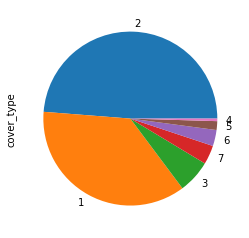

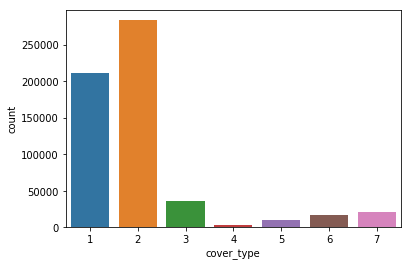

,2,1,3,7,6,5,4
Percentage,48.759922,36.460521,6.153746,3.530048,2.989095,1.633873,0.472796


In [7]:
# Class distribution

print("Class persontage:")
series = 100 * data['cover_type'].value_counts() / data['cover_type'].count()
ax = data.cover_type.value_counts().plot(kind='pie')
ax.set_aspect('equal')
plt.show()
data["cover_type"].value_counts()
sns.countplot(x="cover_type", data=data)
plt.show()

pd.DataFrame({'Percentage': series}).T

* From the above pie chart it is notable that 85% of class is consist in two catagories, where as no four and five this two class is less than 2%

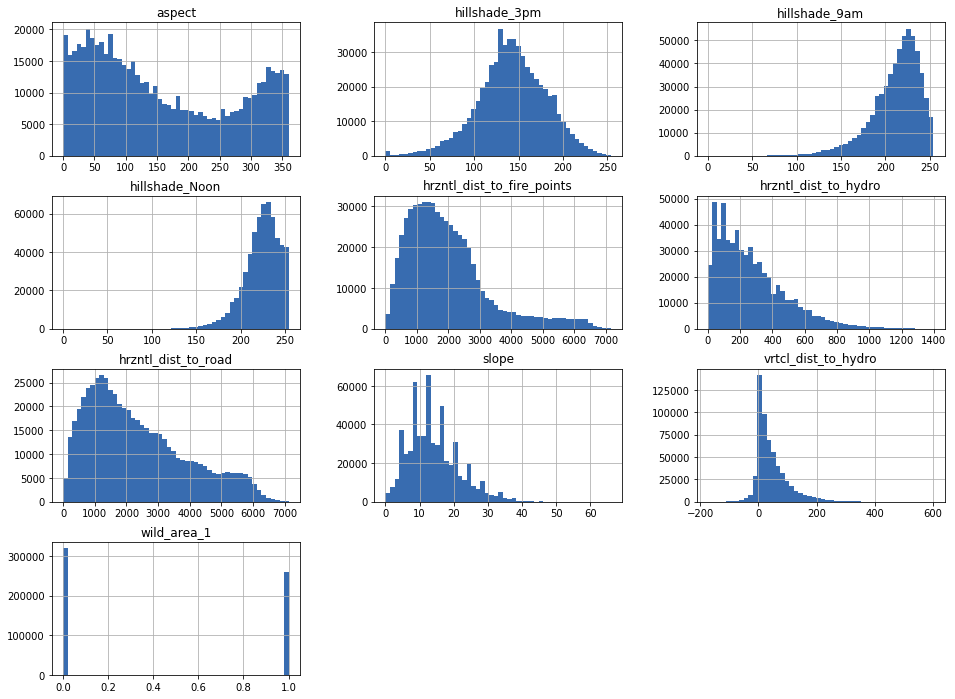

In [8]:
# histogram of the cover type
colors = np.array(['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17'])
data.iloc[:,1:11].hist(figsize=(16,12), bins=50, color=colors[4])
plt.show()

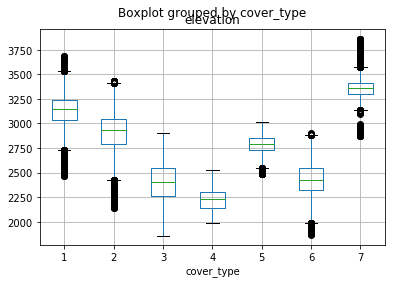

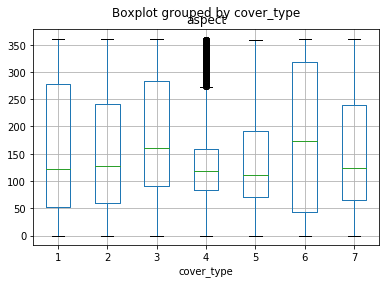

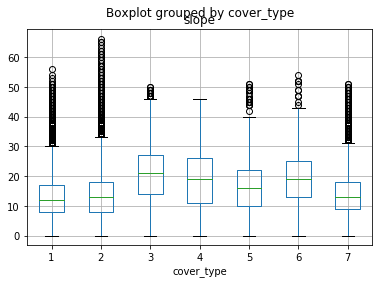

In [9]:
# boxplot for elevation over cover type
data.boxplot(column =  ['elevation'],by = 'cover_type',figsize=(6,4))
plt.show()
# boxplot for aspect over cover type 
data.boxplot(column = ['aspect'],by = 'cover_type',figsize=(6,4))
plt.show()
# boxplot for slope over cover type
data.boxplot(column = ['slope'],by = 'cover_type',figsize=(6,4))
plt.show()

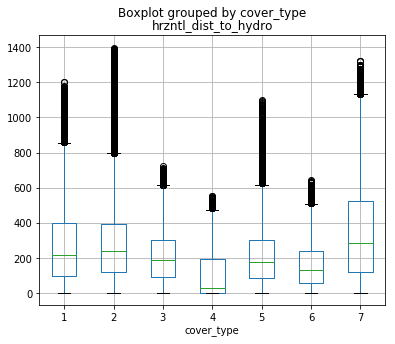

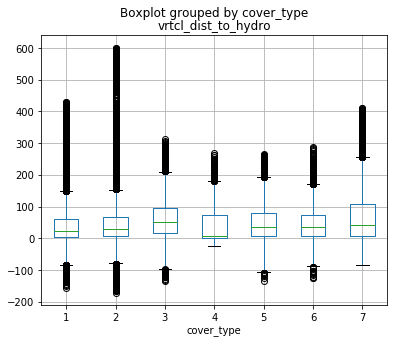

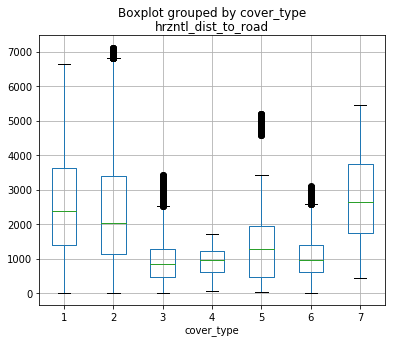

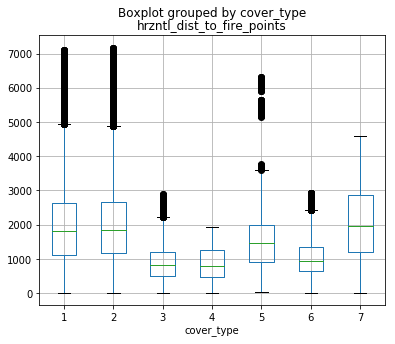

In [10]:
# boxplot for 'hrzntl_dist_to_hydro', 'vrtcl_dist_to_hydro', 'hrzntl_dist_to_road' over cover type
data.boxplot(column =  ['hrzntl_dist_to_hydro'],by = 'cover_type',figsize=(6,5))
plt.show()
data.boxplot(column =  ['vrtcl_dist_to_hydro'],by = 'cover_type',figsize=(6,5))
plt.show()
data.boxplot(column =  ['hrzntl_dist_to_road'],by = 'cover_type',figsize=(6,5))
plt.show()
	
data.boxplot(column =  ['hrzntl_dist_to_fire_points'],by = 'cover_type',figsize=(6,5))
plt.show()

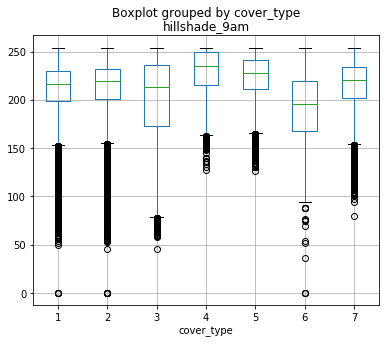

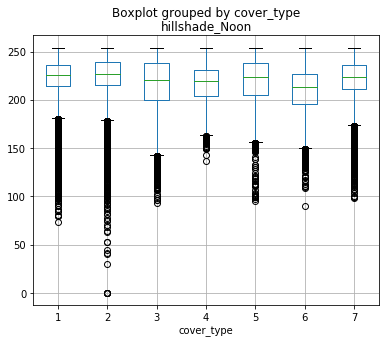

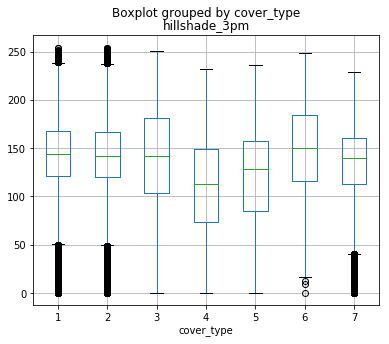

In [11]:
# boxplot for 'hillshade_9am' 'hillshade_Noon', 'hillshade_3pm' over cover type
data.boxplot(column =  ['hillshade_9am'],by = 'cover_type',figsize=(6,5))
plt.show()
data.boxplot(column =  ['hillshade_Noon'],by = 'cover_type',figsize=(6,5))
plt.show()
data.boxplot(column =  ['hillshade_3pm'],by = 'cover_type',figsize=(6,5))
plt.show()

## Scale data

In [12]:
# Scaling the for future manupulating using the pandas data frame and the sklearn

from sklearn import preprocessing

#X = data.drop('cover_type',axis=1)
X = data.drop('cover_type',axis=1).values #returns a numpy array
y = data['cover_type']

min_max_scaling = preprocessing.MinMaxScaler()
X = min_max_scaling.fit_transform(X)
X = pd.DataFrame(X,columns=data.columns[:-1])

C:\Users\golam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
## PCA Analysis

[0.3   0.384 0.453 0.516 0.566 0.614 0.655 0.689 0.719 0.747 0.77  0.792
 0.811 0.829 0.845 0.86  0.874 0.887 0.899 0.911 0.922 0.931 0.94  0.948
 0.955 0.961 0.966 0.97  0.974 0.977 0.98  0.983 0.985 0.987 0.989 0.991
 0.993 0.994 0.995 0.996 0.997 0.998 0.999 1.    1.001 1.001 1.001 1.001
 1.001 1.001 1.001 1.001 1.001 1.001]


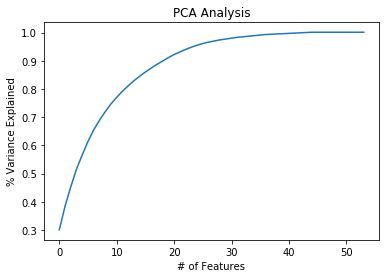

0.9753621804661851

In [13]:
#PCA on the data and reduce its dimensionality with the help of sklearn

from sklearn.decomposition import PCA
my_pca = PCA()
my_pca.fit_transform(X)
pca_val = my_pca.fit_transform(X)
#Explained variance ratio
#print(my_pca.explained_variance_ratio_[:10])


var=np.cumsum(np.round(my_pca.explained_variance_ratio_, decimals=3))
print(var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()
#Cumulative variance
my_pca.explained_variance_ratio_[:30].sum()


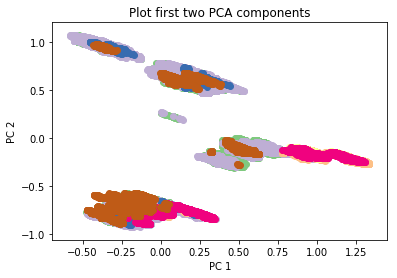

In [14]:
#Plot first two components
plt.ylabel('PC 2')
plt.xlabel('PC 1')
plt.title('Plot first two PCA components')

plt.scatter(pca_val[data['cover_type']==1,1],pca_val[data['cover_type']==1,0],c=colors[0])
plt.scatter(pca_val[data['cover_type']==2,1],pca_val[data['cover_type']==2,0],c=colors[1])
plt.scatter(pca_val[data['cover_type']==3,1],pca_val[data['cover_type']==3,0],c=colors[2])
plt.scatter(pca_val[data['cover_type']==4,1],pca_val[data['cover_type']==4,0],c=colors[3])
plt.scatter(pca_val[data['cover_type']==5,1],pca_val[data['cover_type']==5,0],c=colors[4])
plt.scatter(pca_val[data['cover_type']==6,1],pca_val[data['cover_type']==6,0],c=colors[5])
plt.scatter(pca_val[data['cover_type']==7,1],pca_val[data['cover_type']==7,0],c=colors[6])


plt.show()

C:\Users\golam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


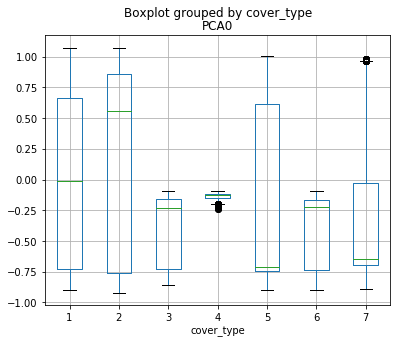

In [15]:
df = data[['cover_type','slope']]
df['PCA0']= pca_val[:,0]
df.boxplot(column =  ['PCA0'],by = 'cover_type',figsize=(6,5))
plt.show()


### Predictive Modeling 
##### Bellow in the section the different classifier is been implemented  and observer their performance and the run time such as 

* Decision tree classifier
* Random Forest Classifier
* KNN Classifier
* Naive Baise Classifier


###  1. Decision Tree Classifier

### Shuffle and Generate Train and Test datasets
#### Let's split up the data into a training set and a test set! We used sklearn to split the data in test and train where we keep the test size as 30%

In [16]:
from sklearn.model_selection import train_test_split

# Shuffle the data to get more accuricy
data=shuffle(data)

# Make Test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Decision Trees
#### We'll start just by training a single decision tree.

In [17]:
from sklearn.tree import DecisionTreeClassifier

startTime = time.time() # track the start time for calculate the timing of fitting the model of decission tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# Executing time 
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)
sys.stdout.write("Total running time on fiting the decision tree: %d:%d:%d.\n" % (hours, mins, secs))

Total running time on fiting the decision tree: 0:0:5.


### Prediction and Evaluation for Decision tree
#### Let's evaluate our decision tree.

In [18]:
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print ("Classification Report - Test")
print(classification_report(y_test,predictions))

Classification Report - Test
             precision    recall  f1-score   support

          1       0.93      0.94      0.94     63498
          2       0.95      0.95      0.95     85079
          3       0.92      0.92      0.92     10631
          4       0.83      0.82      0.83       796
          5       0.83      0.82      0.83      2936
          6       0.87      0.86      0.87      5293
          7       0.94      0.94      0.94      6071

avg / total       0.94      0.94      0.94    174304



In [21]:
print(confusion_matrix(y_test,predictions))

[[59517  3600     4     0    35    10   332]
 [ 3782 80419   240     2   392   192    52]
 [    8   244  9825    91    31   432     0]
 [    0     1    98   656     0    41     0]
 [   56   442    28     0  2401     8     1]
 [    9   186   465    40    17  4576     0]
 [  327    35     0     0     0     0  5709]]


In [22]:
# Perform grid search
from sklearn.grid_search import GridSearchCV

startTime = time.time() # track the start time for calculate the timing of grid search

param_grid = [
    {'max_depth': [10,20,30,40,50,60], 'criterion': ['entropy', 'gini'],'splitter' : ['best', 'random']}
]
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
for params, mean_score, scores in tree.grid_scores_:
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, scores.std() * 2, params))

# Print best params
print('\nBest parameters:', tree.best_params_)

print('\nClassification report ({}):\n')
print(classification_report(y_test, tree.predict(X_test)))

# Executing time 
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)
sys.stdout.write("Total running time for grid search in Decission tree: %d:%d:%d.\n" % (hours, mins, secs))

C:\Users\golam\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Grid search mean and stdev:

0.770 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
0.731 (+/-0.016) for {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}
0.905 (+/-0.003) for {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}
0.855 (+/-0.009) for {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'random'}
0.926 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 30, 'splitter': 'best'}
0.910 (+/-0.009) for {'criterion': 'entropy', 'max_depth': 30, 'splitter': 'random'}
0.927 (+/-0.003) for {'criterion': 'entropy', 'max_depth': 40, 'splitter': 'best'}
0.918 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 40, 'splitter': 'random'}
0.927 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 50, 'splitter': 'best'}
0.918 (+/-0.003) for {'criterion': 'entropy', 'max_depth': 50, 'splitter': 'random'}
0.927 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 60, 'splitter': 'best'}
0.919 (+/-0.003) for {'criterion': 'entropy', 'm

###  2. Now lets see the performance of Random forest
   * Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=100)


In [25]:
startTime = time.time() # track the start time for calculate the timing fiting the model

rfc.fit(X_train,y_train)

# Executing time 
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)
sys.stdout.write("Total running time to fit the random forest model: %d:%d:%d.\n" % (hours, mins, secs))


Total running time to fit the random forest model: 0:1:13.


#### Predictions and Evaluation of Random forest


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

startTime = time.time() # track the start time for calculate the timing

predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

# Executing time for making the classification report on random forest
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

sys.stdout.write("Total running time to predect the random forest: %d:%d:%d.\n" % (hours, mins, secs))

             precision    recall  f1-score   support

          1       0.96      0.94      0.95     63498
          2       0.95      0.97      0.96     85079
          3       0.93      0.96      0.95     10631
          4       0.92      0.85      0.89       796
          5       0.94      0.76      0.84      2936
          6       0.93      0.88      0.91      5293
          7       0.97      0.94      0.96      6071

avg / total       0.95      0.95      0.95    174304

Total running time to predect the random forest: 0:0:5.


#### Show the Confusion Matrix for the predictions.

In [27]:
print(confusion_matrix(y_test,predictions))

[[59754  3571     1     0    16     6   150]
 [ 2021 82660   171     0   112    97    18]
 [    3   185 10181    38    12   212     0]
 [    0     0    91   677     0    28     0]
 [   49   630    32     0  2217     8     0]
 [    2   153   433    18     3  4684     0]
 [  298    37     0     0     0     0  5736]]


* From the above result we can see the performance of both of the decision tree and the random forest is almost same, just a little bit better in decission tree algorithm, 
    however random forest algorithm was taking extra time to execute the program. 

### 3. K-Nearest Neighbour algorithm

In [28]:
#Divide data into K-parts (each parts will have training and test set)
def KFoldCustom(data, K):
        Y=data.iloc[:, -1].values
       
       # Y=df.iloc[:, 1].values

        #df.drop(df.columns[[1, 0]], axis=1, inplace=True)

        N=len(data)

        k=int(N/K)
        n=0
        i=0
        x_trains, x_tests, y_trains, y_tests=[],[],[],[]
        listR2=[]
        
         #Loop over all data to get it divided into K-parts trainng and test sets
        while n<=N:

            x_test=data[n:n+k]
            x_train=data.drop(data.index[n:n+k])

            y_test=Y[n:n+k]
        
            my_list=list(Y)
            del my_list[n:n+k]

            y_train=np.array(my_list)
            
            #print(n, k, x_train.shape, x_test.shape, y_test.shape)
            n +=k
            if i<=K:
               
                x_trains.append(x_train)
                x_tests.append(x_test)
                y_trains.append(y_train)
                y_tests.append(y_test)
            i +=1
            
            #print(len(x_trains))
        return x_trains, x_tests, y_trains, y_tests




In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

startTime = time.time() # track the start time for calculate the timing

K=5
x_trains, x_tests, y_trains, y_tests = KFoldCustom(data, K)

sum1=0
for i in range(0, K):
    
    # instantiate learning model (k = 3)
    knn = KNeighborsClassifier(n_neighbors=3)
    # fitting the model
    knn.fit(x_trains[i], y_trains[i])
    # predict the response
    
    #model=knn.fit(x_trains[i], y_trains[i])
    y_pred=knn.predict(x_tests[i])
    
   # evaluate accuracy
    #print (accuracy_score(y_test, y_pred))
    #

    acc = accuracy_score(y_tests[i], y_pred)
    sum1 +=acc
    print('----'*5 + 'Accuracy in ' + 'Iteration:' + str(i) + '----'*7)
    print(acc)
    
    #key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(iris.target_names)])
    print('Classification report :')
    print(classification_report(y_tests[i], y_pred))


    #print('Confusion matrix ({}):\n'.format(key))
    y_actu = pd.Series(y_tests[i], name='Actual')
    y_pred = pd.Series(knn.predict(x_tests[i]), name='Predicted')
    confusion = pd.crosstab(y_actu, y_pred)
    print(confusion)
    
print('Average accuracy using K-Fold cross validation:', sum1/K)
print('')

# Executing time for making the classification report on KNN
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

sys.stdout.write("Total running time in KNN: %d:%d:%d.\n" % (hours, mins, secs))


--------------------Accuracy in Iteration:0----------------------------
0.9691313402523193
Classification report :
             precision    recall  f1-score   support

          1       0.97      0.97      0.97     42294
          2       0.97      0.97      0.97     56711
          3       0.96      0.97      0.97      7050
          4       0.90      0.81      0.85       534
          5       0.90      0.90      0.90      1916
          6       0.95      0.94      0.94      3607
          7       0.98      0.97      0.97      4090

avg / total       0.97      0.97      0.97    116202

Predicted      1      2     3    4     5     6     7
Actual                                              
1          40994   1188     2    0    25     5    80
2           1165  55278    60    0   147    50    11
3              1     75  6824   33    10   107     0
4              0      1    66  435     0    32     0
5             21    144    15    0  1732     3     1
6              4     84   111   16

### 4.  Naive Bayes

In [30]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Use scalled data for Naive Bayer classifier
startTime = time.time() # track the start time for calculate the timing

X_ = X.copy()
X_['cover_type']=y

#Shuffel the data set
X_=shuffle(X_)

#Get k-fold 
K=2
x_trains, x_tests, y_trains, y_tests = KFoldCustom(X_, K)

sum1=0
for i in range(0, K):
    

    mdl = MultinomialNB(alpha=0.01)
    # fitting the model
    mdl.fit(x_trains[i], y_trains[i])
    # predict the response
    
    #model=knn.fit(x_trains[i], y_trains[i])
    y_pred=mdl.predict(x_tests[i])
    
   # evaluate accuracy
    #print (accuracy_score(y_test, y_pred))
    #

    acc = accuracy_score(y_tests[i], y_pred)
    sum1 +=acc
    print('----'*5 + 'Accuracy in ' + 'Iteration:' + str(i) + '----'*7)
    print(acc)
    
    #key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(iris.target_names)])
    print('Classification report :')
    print(classification_report(y_tests[i], y_pred))


    #print('Confusion matrix ({}):\n'.format(key))
    y_actu = pd.Series(y_tests[i], name='Actual')
    y_pred = pd.Series(mdl.predict(x_tests[i]), name='Predicted')
    confusion = pd.crosstab(y_actu, y_pred)
    print(confusion)
    
print('Average accuracy using K-Fold cross validation:', sum1/K)
print('')

# Executing time for making the classification report on Naive base
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

sys.stdout.write("Total running time to predect IN Naive base: %d:%d:%d.\n" % (hours, mins, secs))

--------------------Accuracy in Iteration:0----------------------------
0.7177855190598473
Classification report :
             precision    recall  f1-score   support

          1       0.77      0.55      0.64    106119
          2       0.68      0.85      0.76    141581
          3       0.67      0.94      0.78     17807
          4       0.57      0.18      0.28      1361
          5       0.44      0.07      0.12      4683
          6       0.96      0.59      0.73      8693
          7       1.00      0.81      0.89     10262

avg / total       0.73      0.72      0.71    290506

Predicted      1       2      3    4    5     6     7
Actual                                               
1          58004   48031     84    0    0     0     0
2          17148  119879   4551    3    0     0     0
3              0     860  16715  161   23    48     0
4              0       0    997  250    0   114     0
5              0    3844    452    0  311    76     0
6              0     997   

## Find Alpha for Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

startTime = time.time() # track the start time for calculate the timing


# Perform grid search
param_grid = [
    {'alpha': [ 10,1, 0.1,0.001,0.0001]}
]
nb = GridSearchCV(MultinomialNB(), param_grid)
nb.fit(X_train, y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
for params, mean_score, scores in nb.grid_scores_:
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, scores.std() * 2, params))

# Print best params
print('\nBest parameters:', nb.best_params_)

#print('\nClassification report ({}):\n'.format(key))
print(classification_report(y_test, nb.predict(X_test)))

# Executing time for making the classification report on logistic regration
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

sys.stdout.write("Total running time to predect IN Logistic regration: %d:%d:%d.\n" % (hours, mins, secs))


Grid search mean and stdev:

0.641 (+/-0.000) for {'alpha': 10}
0.642 (+/-0.001) for {'alpha': 1}
0.642 (+/-0.001) for {'alpha': 0.1}
0.642 (+/-0.001) for {'alpha': 0.001}
0.642 (+/-0.001) for {'alpha': 0.0001}

Best parameters: {'alpha': 1}
             precision    recall  f1-score   support

          1       0.66      0.47      0.55     63498
          2       0.65      0.81      0.72     85079
          3       0.55      0.93      0.69     10631
          4       0.57      0.14      0.23       796
          5       0.00      0.00      0.00      2936
          6       0.55      0.03      0.06      5293
          7       0.68      0.56      0.62      6071

avg / total       0.64      0.64      0.62    174304

Total running time to predect IN Logistic regration: 0:0:3.


In [32]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

 





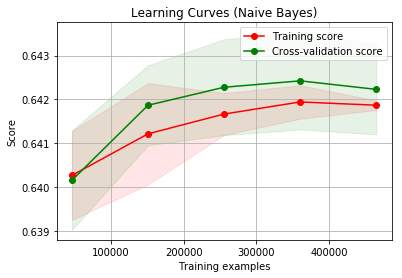

Total running time inl learning curb in naibe base: 0:0:11.


In [33]:
startTime = time.time() # track the start time for calculating learning curb of naibe base


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

#estimator = GaussianNB()
estimator = MultinomialNB()
plot_learning_curve(estimator, title, X, y,  cv=cv, n_jobs=4)

plt.show()

# Executing time for making the classification report on logistic regration
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

sys.stdout.write("Total running time inl learning curb in naibe base: %d:%d:%d.\n" % (hours, mins, secs))


Total running time in learning curb of linear SVC: 0:5:35.


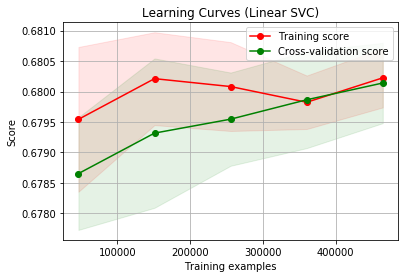

In [34]:
from sklearn.svm import LinearSVC
startTime = time.time() # track the start time for calculate the timing


title = "Learning Curves (Linear SVC)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearSVC(C=0.1, penalty='l2', class_weight='balanced')
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

# Executing time for making the classification report on logistic regration
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

sys.stdout.write("Total running time in learning curb of linear SVC: %d:%d:%d.\n" % (hours, mins, secs))


Total running time in learning curn of KNN: 0:2:4.


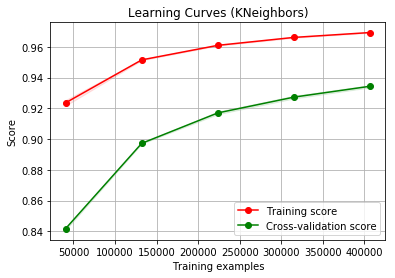

In [35]:
from sklearn.neighbors import KNeighborsClassifier
startTime = time.time() # track the start time for calculate the timing


title = "Learning Curves (KNeighbors)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=3)
plot_learning_curve(estimator, title, pca_val[:,:15], y,  cv=cv, n_jobs=4)

# Executing time for making the classification report on logistic regration
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

sys.stdout.write("Total running time in learning curn of KNN: %d:%d:%d.\n" % (hours, mins, secs))


Total running time to learning curb in decision tree: 0:5:35.


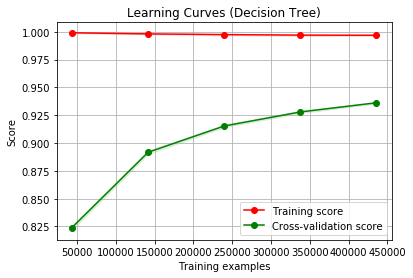

In [0]:
from sklearn.tree import DecisionTreeClassifier
startTime = time.time() # track the start time for calculate the timing

title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5,test_size=0.25, random_state=5)

estimator = DecisionTreeClassifier(max_depth=30)
plot_learning_curve(estimator, title, X, y,  cv=cv, n_jobs=4)

# Executing time for making the classification report on logistic regration
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

sys.stdout.write("Total running time to learning curb in decision tree: %d:%d:%d.\n" % (hours, mins, secs))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Total running time in learning curb of random classifier: 0:1:58.


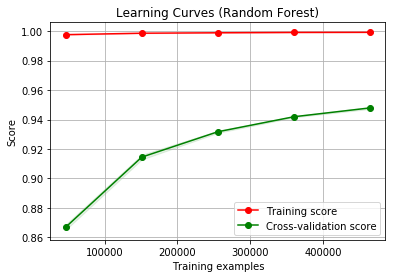

In [0]:
from sklearn.ensemble import RandomForestClassifier
startTime = time.time() # track the start time for calculate the timing

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = RandomForestClassifier( n_estimators=15)
print(estimator)
plot_learning_curve(estimator, title, X, y,  cv=cv, n_jobs=4)

# Executing time for making the classification report on logistic regration
total_time=time.time() - startTime
mins, secs = divmod(total_time, 60)
hours, mins = divmod(mins, 60)

sys.stdout.write("Total running time in learning curb of random classifier: %d:%d:%d.\n" % (hours, mins, secs))
